<a href="https://colab.research.google.com/github/himabindu-thota/W207-AppliedML-final-project/blob/main/yield_curve_1990_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
y_df = pd.read_csv("yield-curve-rates-1990-2021.csv", parse_dates=["Date"])

In [217]:
y_df.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2021-12-31,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
1,2021-12-30,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2,2021-12-29,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
3,2021-12-28,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
4,2021-12-27,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88


In [218]:
y_df.tail()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
8003,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8004,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8005,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8006,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
8007,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00


In [219]:
y_df.set_index("Date", inplace=True)

In [220]:
print(get_total_na(y_df))

7205


In [221]:
y_df["1 Mo"].isna().sum().sum()

2900

In [222]:
y_df["2 Mo"].isna().sum().sum()

7205

In [223]:
y_df["3 Mo"].isna().sum().sum()

4

In [224]:
y_df["6 Mo"].isna().sum().sum()

1

In [225]:
y_df["1 Yr"].isna().sum().sum()

1

In [226]:
y_df["2 Yr"].isna().sum().sum()

1

In [227]:
y_df[y_df['2 Yr'].isnull()]

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2010-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
y_df["2010-10-12"]

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2010-10-12,0.14,NaN,0.13,0.17,0.21,0.37,0.59,1.14,1.77,2.44,3.44,3.8


In [229]:
y_df["2010-10-11"]

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2010-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
y_df["2010-10-10"]

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,


In [231]:
y_df["2010-10-09"]

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,


In [232]:
y_df["2010-10"]

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2010-10-29,0.14,NaN,0.12,0.17,0.22,0.34,0.51,1.17,1.89,2.63,3.64,3.99
2010-10-28,0.14,NaN,0.13,0.18,0.23,0.37,0.56,1.23,1.97,2.69,3.70,4.05
2010-10-27,0.14,NaN,0.14,0.18,0.23,0.40,0.64,1.34,2.06,2.75,3.72,4.06
2010-10-26,0.14,NaN,0.14,0.18,0.23,0.40,0.59,1.27,1.98,2.67,3.66,4.00
2010-10-25,0.13,NaN,0.14,0.18,0.23,0.37,0.55,1.20,1.89,2.59,3.56,3.91
2010-10-22,0.13,NaN,0.13,0.18,0.21,0.35,0.54,1.17,1.88,2.59,3.59,3.94
2010-10-21,0.13,NaN,0.13,0.18,0.22,0.37,0.52,1.15,1.85,2.57,3.59,3.95
2010-10-20,0.14,NaN,0.14,0.17,0.22,0.35,0.52,1.11,1.79,2.51,3.53,3.89
2010-10-19,0.14,NaN,0.14,0.18,0.22,0.37,0.54,1.11,1.79,2.50,3.53,3.90


In [233]:
y_df["2 Yr"].fillna(0.37, inplace=True)

In [234]:
y_df.loc["2010-10-11"]["2 Yr"]

Date
2010-10-11    0.37
Name: 2 Yr, dtype: float64

In [235]:
y_df["2010-10"]

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2010-10-29,0.14,NaN,0.12,0.17,0.22,0.34,0.51,1.17,1.89,2.63,3.64,3.99
2010-10-28,0.14,NaN,0.13,0.18,0.23,0.37,0.56,1.23,1.97,2.69,3.70,4.05
2010-10-27,0.14,NaN,0.14,0.18,0.23,0.40,0.64,1.34,2.06,2.75,3.72,4.06
2010-10-26,0.14,NaN,0.14,0.18,0.23,0.40,0.59,1.27,1.98,2.67,3.66,4.00
2010-10-25,0.13,NaN,0.14,0.18,0.23,0.37,0.55,1.20,1.89,2.59,3.56,3.91
2010-10-22,0.13,NaN,0.13,0.18,0.21,0.35,0.54,1.17,1.88,2.59,3.59,3.94
2010-10-21,0.13,NaN,0.13,0.18,0.22,0.37,0.52,1.15,1.85,2.57,3.59,3.95
2010-10-20,0.14,NaN,0.14,0.17,0.22,0.35,0.52,1.11,1.79,2.51,3.53,3.89
2010-10-19,0.14,NaN,0.14,0.18,0.22,0.37,0.54,1.11,1.79,2.50,3.53,3.90


In [236]:
y_df["3 Yr"].isna().sum().sum()

1

In [237]:
y_df["5 Yr"].isna().sum().sum()

1

In [238]:
y_df["7 Yr"].isna().sum().sum()

1

In [239]:
y_df["10 Yr"].isna().sum().sum()

1

In [240]:
y_df["20 Yr"].isna().sum().sum()

940

In [241]:
y_df["30 Yr"].isna().sum().sum()

995

In [242]:
def compute_quarter_avg(df, feature, start_year, end_year):

  fiscal_quarter_avg = {}

  year = start_year - 1
  first_year = True

  while year <= end_year:

    next = year + 1
    if not first_year:
      # Q2
      key = str(year) + "-" + str(next) + " " + "Q2"
      start = pd.datetime(year, 1, 1)
      end = pd.datetime(year, 3, 31)
      fiscal_quarter_avg[key] = df[start:end][feature].mean()

      # Q3
      key = str(year) + "-" + str(next) + " " + "Q3"
      start = pd.datetime(year, 4, 1)
      end = pd.datetime(year, 6, 30)
      fiscal_quarter_avg[key] = df[start:end][feature].mean()

      # Q4
      key = str(year) + "-" + str(next) + " " + "Q4"
      start = pd.datetime(year, 7, 1)
      end = pd.datetime(year, 9, 30)
      fiscal_quarter_avg[key] = df[start:end][feature].mean()
      if year == end_year:
        break

    # Q1
    key = str(year) + "-" + str(next) + " " + "Q1"
    start = pd.datetime(year, 10, 1)
    end = pd.datetime(year, 12, 31)
    fiscal_quarter_avg[key] = df[start:end][feature].mean()
    if first_year:
      first_year = False

    year += 1

  return fiscal_quarter_avg

In [243]:
# S&P Data Analysis

def compute_SP_data_by_fiscal_quarter(df, start_year, end_year):
  open = compute_quarter_avg(df, "Open", start_year, end_year)
  high = compute_quarter_avg(df, "High", start_year, end_year)
  low = compute_quarter_avg(df, "Low", start_year, end_year)
  close = compute_quarter_avg(df, "Close", start_year, end_year)
  adj_close = compute_quarter_avg(df, "Adj Close", start_year, end_year)
  volume = compute_quarter_avg(df, "Volume", start_year, end_year)
  
  fiscal_quarter_open = pd.Series(open.values(), name="open")
  fiscal_quarter_open.index = pd.Index(list(open.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_high = pd.Series(high.values(), name="high")
  fiscal_quarter_high.index = pd.Index(list(high.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_low = pd.Series(low.values(), name="low")
  fiscal_quarter_low.index = pd.Index(list(low.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_close = pd.Series(close.values(), name="close")
  fiscal_quarter_close.index = pd.Index(list(close.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_adj_close = pd.Series(adj_close.values(), name="adj_close")
  fiscal_quarter_adj_close.index = pd.Index(list(adj_close.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_volume = pd.Series(volume.values(), name="volume")
  fiscal_quarter_volume.index = pd.Index(list(volume.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_df = pd.DataFrame([fiscal_quarter_open, fiscal_quarter_high, 
                                    fiscal_quarter_low, fiscal_quarter_close,
                                    fiscal_quarter_adj_close, fiscal_quarter_volume]).T
  return fiscal_quarter_df

In [244]:
df = pd.read_csv("SP_500_Historical_Data_1927_2020.csv", parse_dates=["Date"])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [245]:
df.set_index("Date", inplace = True)

In [246]:
sp_fiscal_28_38_df = compute_SP_data_by_fiscal_quarter(df, 1928, 1938)
sp_fiscal_39_49_df = compute_SP_data_by_fiscal_quarter(df, 1939, 1949)
sp_fiscal_50_60_df = compute_SP_data_by_fiscal_quarter(df, 1950, 1960)
sp_fiscal_61_71_df = compute_SP_data_by_fiscal_quarter(df, 1961, 1971)
sp_fiscal_72_82_df = compute_SP_data_by_fiscal_quarter(df, 1972, 1982)
sp_fiscal_83_93_df = compute_SP_data_by_fiscal_quarter(df, 1983, 1993)
sp_fiscal_94_04_df = compute_SP_data_by_fiscal_quarter(df, 1994, 2004)
sp_fiscal_05_15_df = compute_SP_data_by_fiscal_quarter(df, 2005, 2015)
sp_fiscal_16_20_df = compute_SP_data_by_fiscal_quarter(df, 2016, 2020)

In [293]:
def compute_Treasury_Yield_by_fiscal_quarter(df, feature, start_year, end_year):
  res = compute_quarter_avg(df, feature, start_year, end_year)
  print(res)
  
  fiscal_quarter_open = pd.Series(res.values(), name="2 Yr")
  fiscal_quarter_open.index = pd.Index(list(res.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_df = pd.DataFrame([fiscal_quarter_open]).T
  return fiscal_quarter_df

In [301]:
SP_91_00 = compute_SP_data_by_fiscal_quarter(df, 1991, 2000)

In [295]:
y_df = y_df.sort_values(by="Date")

In [302]:
Y_91_00 = compute_Treasury_Yield_by_fiscal_quarter(y_df, "2 Yr", 1991, 2000)

{'1990-1991 Q1': 7.606129032258064, '1991-1992 Q2': 7.036, '1991-1992 Q3': 6.8940624999999995, '1991-1992 Q4': 6.52109375, '1991-1992 Q1': 5.503709677419355, '1992-1993 Q2': 5.2938709677419356, '1992-1993 Q3': 5.2031746031746025, '1992-1993 Q4': 4.15078125, '1992-1993 Q1': 4.444677419354839, '1993-1994 Q2': 4.13311475409836, '1993-1994 Q3': 3.9957142857142856, '1993-1994 Q4': 3.9739062499999998, '1993-1994 Q1': 4.084999999999999, '1994-1995 Q2': 4.559677419354839, '1994-1995 Q3': 5.8267741935483865, '1994-1995 Q4': 6.233124999999999, '1994-1995 Q1': 7.162622950819673, '1995-1996 Q2': 7.114516129032259, '1995-1996 Q3': 6.131746031746031, '1995-1996 Q4': 5.861587301587301, '1995-1996 Q1': 5.502903225806451, '1996-1997 Q2': 5.270161290322582, '1996-1997 Q3': 6.11078125, '1996-1997 Q4': 6.1759375, '1996-1997 Q1': 5.803709677419356, '1997-1998 Q2': 6.044666666666667, '1997-1998 Q3': 6.2759374999999995, '1997-1998 Q4': 5.90375, '1997-1998 Q1': 5.734516129032259, '1998-1999 Q2': 5.44967213114

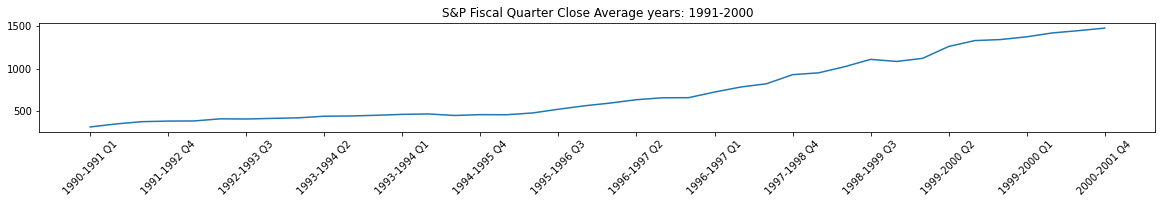

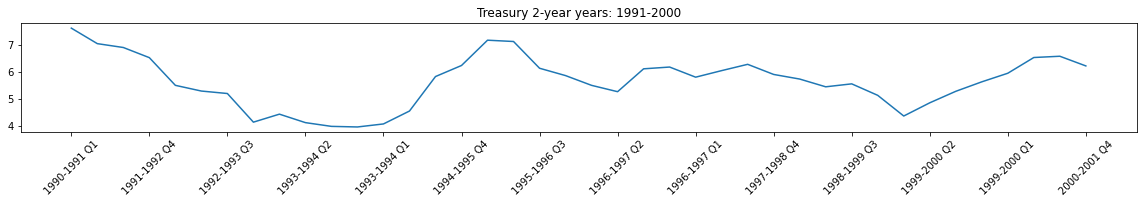

In [306]:
fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(SP_91_00.index, SP_91_00["close"])
ax.set_title("S&P Fiscal Quarter Close Average years: 1991-2000")
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation = 45)
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(Y_91_00.index, Y_91_00["2 Yr"])
ax.set_title("Treasury 2-year years: 1991-2000")
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation = 45)
plt.show()

{'2000-2001 Q1': 5.719032258064518, '2001-2002 Q2': 4.5801612903225815, '2001-2002 Q3': 4.191746031746033, '2001-2002 Q4': 3.676229508196722, '2001-2002 Q1': 2.8670967741935476, '2002-2003 Q2': 3.2005, '2002-2003 Q3': 3.2339062499999995, '2002-2003 Q4': 2.2387499999999996, '2002-2003 Q1': 1.889677419354839, '2003-2004 Q2': 1.6490163934426232, '2003-2004 Q3': 1.4215873015873013, '2003-2004 Q4': 1.67828125, '2003-2004 Q1': 1.8562903225806453, '2004-2005 Q2': 1.6866129032258061, '2004-2005 Q3': 2.4546774193548386, '2004-2005 Q4': 2.5565625, '2004-2005 Q1': 2.82241935483871, '2005-2006 Q2': 3.454918032786886, '2005-2006 Q3': 3.6459374999999996, '2005-2006 Q4': 3.95796875, '2005-2006 Q1': 4.364590163934427, '2006-2007 Q2': 4.6046774193548385, '2006-2007 Q3': 4.997936507936509, '2006-2007 Q4': 4.929047619047618, '2006-2007 Q1': 4.73758064516129, '2007-2008 Q2': 4.760483870967741, '2007-2008 Q3': 4.803749999999999, '2007-2008 Q4': 4.3907936507936505, '2007-2008 Q1': 3.4896774193548388, '2008-

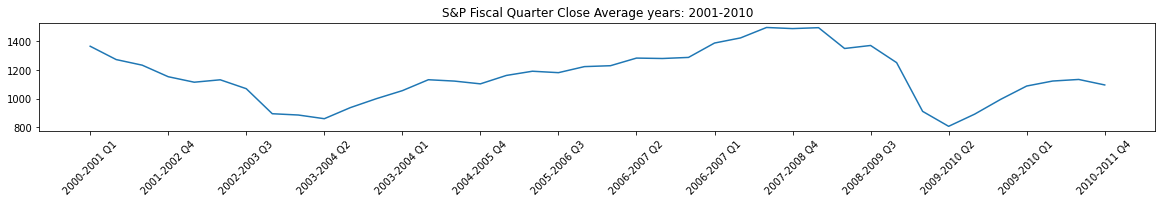

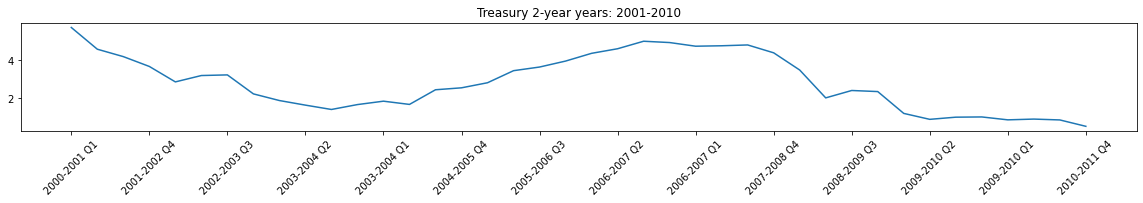

In [308]:
SP_01_10 = compute_SP_data_by_fiscal_quarter(df, 2001, 2010)
Y_01_10 = compute_Treasury_Yield_by_fiscal_quarter(y_df, "2 Yr", 2001, 2010)

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(SP_01_10.index, SP_01_10["close"])
ax.set_title("S&P Fiscal Quarter Close Average years: 2001-2010")
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation = 45)
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(Y_01_10.index, Y_01_10["2 Yr"])
ax.set_title("Treasury 2-year years: 2001-2010")
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation = 45)
plt.show()

{'2009-2010 Q1': 0.8779032258064517, '2010-2011 Q2': 0.917704918032787, '2010-2011 Q3': 0.8731250000000002, '2010-2011 Q4': 0.5387500000000001, '2010-2011 Q1': 0.4852380952380953, '2011-2012 Q2': 0.6937096774193549, '2011-2012 Q3': 0.5615873015873016, '2011-2012 Q4': 0.27921874999999996, '2011-2012 Q1': 0.26360655737704913, '2012-2013 Q2': 0.289516129032258, '2012-2013 Q3': 0.28953125, '2012-2013 Q4': 0.2577777777777778, '2012-2013 Q1': 0.26754098360655737, '2013-2014 Q2': 0.26283333333333336, '2013-2014 Q3': 0.27015625, '2013-2014 Q4': 0.3659375, '2013-2014 Q1': 0.32725806451612904, '2014-2015 Q2': 0.3747540983606557, '2014-2015 Q3': 0.4195238095238095, '2014-2015 Q4': 0.515, '2014-2015 Q1': 0.5366129032258065, '2015-2016 Q2': 0.6045901639344261, '2015-2016 Q3': 0.61265625, '2015-2016 Q4': 0.6925, '2015-2016 Q1': 0.8382258064516129, '2016-2017 Q2': 0.8362295081967213, '2016-2017 Q3': 0.77125, '2016-2017 Q4': 0.7281249999999999, '2016-2017 Q1': 1.0095081967213115, '2017-2018 Q2': 1.244

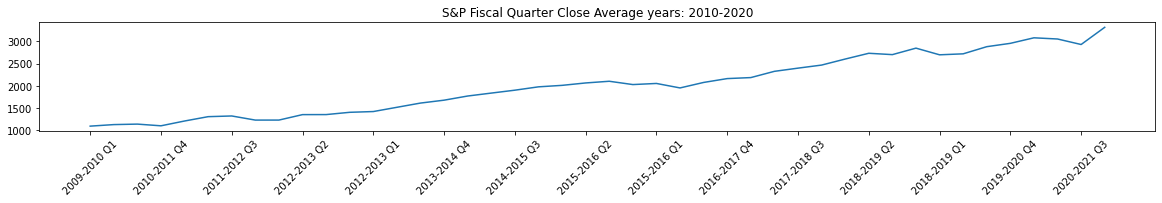

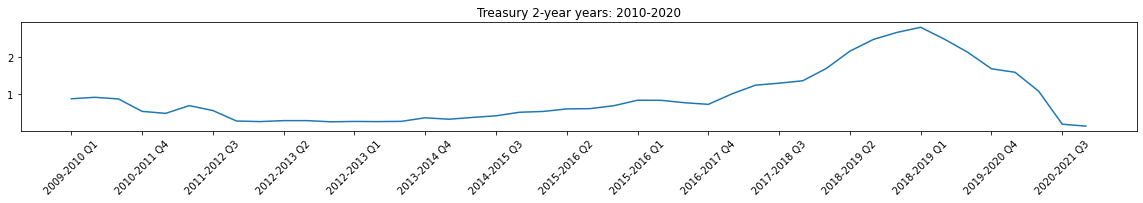

In [309]:
SP_10_20 = compute_SP_data_by_fiscal_quarter(df, 2010, 2020)
Y_10_20 = compute_Treasury_Yield_by_fiscal_quarter(y_df, "2 Yr", 2010, 2020)

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(SP_10_20.index, SP_10_20["close"])
ax.set_title("S&P Fiscal Quarter Close Average years: 2010-2020")
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation = 45)
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(Y_10_20.index, Y_10_20["2 Yr"])
ax.set_title("Treasury 2-year years: 2010-2020")
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation = 45)
plt.show()